<a href="https://colab.research.google.com/github/AdrianArguello/Redes-Neuronales-en-la-Banca/blob/main/Redes_Neuronales_en_la_Banca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/Bank_registries.csv')

In [45]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
df.shape

(10000, 14)

Separamos las variables dependientes de la variable independiente a predecir (Exited).

In [9]:
X = df.iloc[:, 3:13].values # Todas las filas desde la columna 3 hasta la 13
y = df.iloc[:, 13].values # Todas las filas de la comunna 13 (Variable target Exited)
pd.DataFrame(X[0:4])

,0,1,2,3,4,5,6,7,8,9
0,619,France,Female,42,2,0.0,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.8,3,1,0,113931.57
3,699,France,Female,39,1,0.0,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.1


Cambiar variables categoricas a numericas

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

columnas_transformadas = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X = np.array(columnas_transformadas.fit_transform(X))
pd.DataFrame(X[0:4])

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,619,42,2,0.0,1,1,1,101348.88
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,608,41,1,83807.86,1,0,1,112542.58
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,502,42,8,159660.8,3,1,0,113931.57
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,699,39,1,0.0,2,0,0,93826.63


Dividimos los datos en entrenamiento y prueba

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Estandarizamos

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Importamos y creamos la estrutura de la red

In [42]:
import tensorflow as tf

# Inicializar el modelo de red neuronal secuencial
classifier = tf.keras.models.Sequential()

# Agregar la capa de entrada y la primera capa oculta
classifier.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Agregar la segunda capa oculta
classifier.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Agregar la capa de salida
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compilar la red neuronal
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar la red neuronal
classifier.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7200 - loss: 0.6351
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7893 - loss: 0.4745
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8135 - loss: 0.4325
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8083 - loss: 0.4325
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8223 - loss: 0.4091
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8189 - loss: 0.4085
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8228 - loss: 0.4143
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8302 - loss: 0.4029
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8211 - loss: 0.4100
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8246 - loss: 0.4043
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8252 - loss: 0.4031
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

Predicción de nuestro clasificador

In [53]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm,)
print()
print("accuracy",accuracy_score(y_test, y_pred))



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1537   69]
 [ 210  184]]

accuracy 0.8605


0.8605

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC: 0.8629410017004759


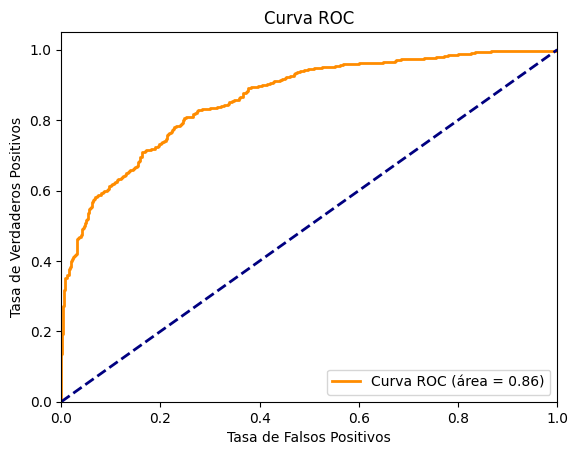

In [59]:

from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de la clase positiva (Exited = 1)
y_pred_prob = classifier.predict(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Imprimir el AUC
print("AUC:", roc_auc)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()